<a href="https://colab.research.google.com/github/gundaminpde/2023-spring/blob/main/02_2_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **0. 전처리**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### from sklearn.neighbors import KNeighborsClassifier

Url_B_cancer="https://raw.githubusercontent.com/gundaminpde/2023-spring/main/Dset_Breast%20Cancer_Wisconsin.csv"


df = pd.read_csv(Url_B_cancer)

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Attribute Information:

* Diagnosis (M = malignant, B = benign)



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df=df.drop(['id',"Unnamed: 32"],axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [7]:
y_original = df['diagnosis']



In [8]:
y_original.head()

,diagnosis
0,M
1,M
2,M
3,M
4,M


In [18]:
# y_original_2=pd.get_dummies(y_original)  ## 옛날엔 되었는데...
y_original_2=pd.get_dummies(y_original).astype(int)
y_original_2.head()

,B,M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:,1:], y_original_2['B'],stratify=y_original_2['B'], random_state=3)

In [20]:
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
281,11.740,14.02,74.24,427.3,0.07813,0.04340,0.02245,0.02763,0.2101,0.06113,...,13.310,18.26,84.70,533.7,0.1036,0.0850,0.06735,0.08290,0.3101,0.06688
78,20.180,23.97,143.70,1245.0,0.12860,0.34540,0.37540,0.16040,0.2906,0.08142,...,23.370,31.72,170.30,1623.0,0.1639,0.6164,0.76810,0.25080,0.5440,0.09964
248,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,12.250,35.19,77.98,455.7,0.1499,0.1398,0.11250,0.06136,0.3409,0.08147
120,11.410,10.82,73.34,403.3,0.09373,0.06685,0.03512,0.02623,0.1667,0.06113,...,12.820,15.97,83.74,510.5,0.1548,0.2390,0.21020,0.08958,0.3016,0.08523
539,7.691,25.44,48.34,170.4,0.08668,0.11990,0.09252,0.01364,0.2037,0.07751,...,8.678,31.89,54.49,223.6,0.1596,0.3064,0.33930,0.05000,0.2790,0.10660


In [21]:
std = StandardScaler()
std.fit(X_train.iloc[:,0:])
X_train.iloc[:,0:]= std.transform(X_train.iloc[:,0:])
X_train.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
281,-0.671799,-1.230238,-0.723020,-0.642037,-1.279838,-1.144226,-0.832219,-0.540062,1.064630,-0.213870,...,-0.603031,-1.210885,-0.660779,-0.598653,-1.243058,-1.069445,-0.987536,-0.477389,0.329329,-0.933254
78,1.743377,1.080998,2.155806,1.706229,2.313272,4.626903,3.669741,2.929992,3.990013,2.682433,...,1.508085,0.993413,1.917078,1.343444,1.400349,2.347860,2.442924,2.111273,4.074589,0.910914
248,-0.983712,1.371354,-0.981228,-0.872642,0.032961,-0.591192,-0.815127,-0.840101,0.323291,0.094460,...,-0.825474,1.561683,-0.863152,-0.737718,0.786623,-0.717039,-0.766508,-0.809490,0.822506,-0.111935
120,-0.766231,-1.973550,-0.760321,-0.710960,-0.169227,-0.696104,-0.670610,-0.576652,-0.512533,-0.213870,...,-0.705858,-1.585910,-0.689689,-0.640016,1.001427,-0.079108,-0.288227,-0.374398,0.193225,0.099728
539,-1.830454,1.422457,-1.796467,-1.379801,-0.671138,0.317666,0.061541,-0.905702,0.832053,2.124299,...,-1.575067,1.021254,-1.570557,-1.151526,1.211847,0.354325,0.343771,-0.984637,-0.168651,1.302715


In [22]:
X_test.iloc[:,0:]= std.transform(X_test.iloc[:,0:])


In [23]:
X_test.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
373,1.875010,-0.456729,1.786938,1.964691,-0.117256,0.082616,0.829151,1.074610,-0.861398,-1.120303,...,1.927790,-0.406791,1.811675,1.919316,1.062799,0.348537,0.718759,1.500725,-0.330374,-0.726658
101,-2.033627,-1.367286,-1.985045,-1.457052,1.487434,-0.527365,-1.118574,-1.262195,0.443213,2.219938,...,-1.732037,-1.001263,-1.693427,-1.219988,1.159242,-0.843082,-1.317242,-1.755531,0.058723,0.583287
187,-0.680384,-0.493895,-0.704784,-0.662139,0.116257,-0.800061,-0.632727,-0.415655,-1.061269,-0.239564,...,-0.665986,-0.698295,-0.669211,-0.620404,0.015081,-0.947261,-0.572650,-0.061106,-0.517717,-0.703014
480,-0.551613,-0.298775,-0.555165,-0.561626,-0.372839,-0.475769,-0.746631,-0.863101,-1.250238,0.030224,...,-0.596735,0.362912,-0.536403,-0.574227,-0.489052,-0.150490,-0.524186,-0.878254,-0.783520,-0.347241
191,-0.377056,0.486348,-0.400572,-0.412006,-0.613471,-0.712156,-0.721631,-0.513665,-0.414414,0.034507,...,-0.510696,-0.352748,-0.530079,-0.516997,-1.669160,-1.038706,-1.063366,-1.019636,-1.146998,-0.830237


In [24]:
y_train.describe()

,B
count,426.000000
mean,0.626761
std,0.484234
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [25]:
y_test.describe()

,B
count,143.000000
mean,0.629371
std,0.484671
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


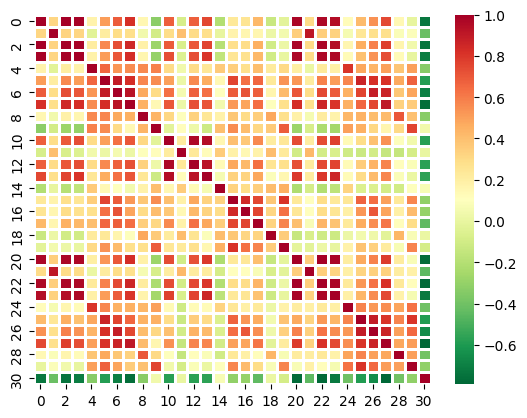

In [26]:
df_cat = pd.concat([X_train,y_train], axis=1)

corr_mat=np.corrcoef(df_cat,rowvar=False)

sns.heatmap(corr_mat,linewidth=1,cmap='RdYlGn_r')
plt.show()


**채색의 종류**

https://matplotlib.org/stable/tutorials/colors/colormaps.html



In [27]:
df_cat.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,B
281,-0.671799,-1.230238,-0.723020,-0.642037,-1.279838,-1.144226,-0.832219,-0.540062,1.064630,-0.213870,...,-1.210885,-0.660779,-0.598653,-1.243058,-1.069445,-0.987536,-0.477389,0.329329,-0.933254,1
78,1.743377,1.080998,2.155806,1.706229,2.313272,4.626903,3.669741,2.929992,3.990013,2.682433,...,0.993413,1.917078,1.343444,1.400349,2.347860,2.442924,2.111273,4.074589,0.910914,0
248,-0.983712,1.371354,-0.981228,-0.872642,0.032961,-0.591192,-0.815127,-0.840101,0.323291,0.094460,...,1.561683,-0.863152,-0.737718,0.786623,-0.717039,-0.766508,-0.809490,0.822506,-0.111935,1
120,-0.766231,-1.973550,-0.760321,-0.710960,-0.169227,-0.696104,-0.670610,-0.576652,-0.512533,-0.213870,...,-1.585910,-0.689689,-0.640016,1.001427,-0.079108,-0.288227,-0.374398,0.193225,0.099728,1
539,-1.830454,1.422457,-1.796467,-1.379801,-0.671138,0.317666,0.061541,-0.905702,0.832053,2.124299,...,1.021254,-1.570557,-1.151526,1.211847,0.354325,0.343771,-0.984637,-0.168651,1.302715,1


In [28]:
X_train.shape

(426, 30)

# **1. 기본적인 모델**

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential()                                                  # 딥러닝 모델의 구조를 결정합니다.
model.add(Dense(30, input_dim=30, activation='relu'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])  # 딥러닝 모델을 실행합니다.

history=model.fit(X_train, y_train, epochs=70, batch_size=16)



Epoch 1/70


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.6666 - loss: 0.5883
Epoch 2/70
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8915 - loss: 0.4223 
Epoch 3/70
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.9475 - loss: 0.3001 
Epoch 4/70
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.9704 - loss: 0.2011 
Epoch 5/70
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.9703 - loss: 0.1689 
Epoch 6/70
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.9775 - loss: 0.1385 
Epoch 7/70
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.9778 - loss: 0.1173 
Epoch 8/70
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.9726 - loss: 0.1118 
Epoch 9/70
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9710 - loss: 0.1086 
Epoch 10/70
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9829 - loss: 0.0836 
Epoch 11/70
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.9748 - loss: 0.1192

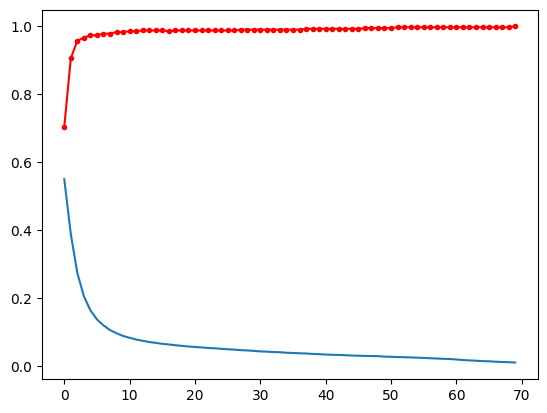

In [30]:
y_loss = history.history['loss']
y_accu = history.history['binary_accuracy']

x_len = np.arange(len(y_loss))

plt.plot(x_len,y_loss)
plt.plot(x_len,y_accu, marker='.', c="red")

plt.show()

In [31]:
A=X_test.iloc[3,0:].to_numpy()

In [32]:
B=A.reshape(1, 30)

In [33]:
model.predict(B,verbose=0)#[:10]

array([[0.9973834]], dtype=float32)

In [34]:
model.predict(X_test,verbose=0)[:10]

array([[0.00111322],
       [0.9986344 ],
       [0.99743366],
       [0.9973834 ],
       [0.9597856 ],
       [0.8075985 ],
       [0.9915837 ],
       [0.00111297],
       [0.06533185],
       [0.00111263]], dtype=float32)

# **2. Validation set을 사용하여 과적합 확인**

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import random

random.seed(5)

model = Sequential()                                                  # 딥러닝 모델의 구조를 결정합니다.
model.add(Dense(30, input_dim=30, activation='relu'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])  # 딥러닝 모델을 실행합니다.

history=model.fit(X_train, y_train, validation_split=0.25, epochs=70, batch_size=16, verbose=1)


Epoch 1/70


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - binary_accuracy: 0.3814 - loss: 0.9095 - val_binary_accuracy: 0.3271 - val_loss: 0.7862
Epoch 2/70
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.4305 - loss: 0.6822 - val_binary_accuracy: 0.6449 - val_loss: 0.6005
Epoch 3/70
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.7241 - loss: 0.5398 - val_binary_accuracy: 0.9159 - val_loss: 0.4631
Epoch 4/70
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.8921 - loss: 0.4329 - val_binary_accuracy: 0.9626 - val_loss: 0.3719
Epoch 5/70
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.9326 - loss: 0.3490 - val_binary_accuracy: 0.9533 - val_loss: 0.3107
Epoch 6/70
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.9714 - loss: 0.2834 - val_binary_accuracy: 0.9533 - val_loss: 0.2691
Epoch 7/70
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.9687 - loss: 0.2500 - val_binary_accuracy: 0.9533 - val_loss: 0.2396
Epoch 8/70
20/20 ━━━━━━━━━━━━━

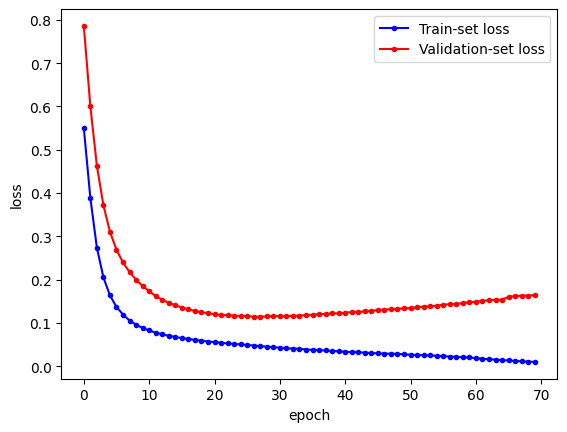

In [36]:
y_val_loss = history.history['val_loss']

plt.plot(x_len,y_loss, marker='.', c="blue", label='Train-set loss')
plt.plot(x_len,y_val_loss, marker='.', c="red",label='Validation-set loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

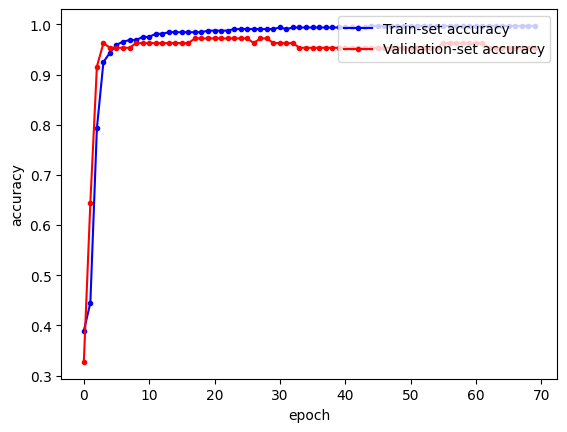

In [37]:
y_accu = history.history['binary_accuracy']
y_val_accu = history.history['val_binary_accuracy']

plt.plot(x_len,y_accu, marker='.', c="blue", label='Train-set accuracy')
plt.plot(x_len,y_val_accu, marker='.', c="red",label='Validation-set accuracy')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

**Early Stopping을 위해서**

**from tensorflow.keras.callback inport ModelCheckpint, EarlyStopping**

**를 사용한다.**

In [38]:
model.evaluate(X_test,y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9709 - loss: 0.1289 


[0.09528806805610657, 0.9790209531784058]

# **3. Soft-max를 사용한 다중분류**

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import random



random.seed(5)

Url_iris="https://raw.githubusercontent.com/gundaminpde/2022/main/iris.csv"


# 아이리스 데이터를 불러옵니다.
df_iris = pd.read_csv(Url_iris)

In [41]:
df_iris.head()

,ID,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [42]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            150 non-null    int64  
 1   Sepal_Length  150 non-null    float64
 2   Sepal_Width   150 non-null    float64
 3   Petal_Length  150 non-null    float64
 4   Petal_Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [43]:
X_iris=df_iris.iloc[:,1:5]
y_iris_string=df_iris.iloc[:,5]


In [45]:
y_iris= pd.get_dummies(y_iris_string).astype(int)
y_iris.head()

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [46]:
model_iris = Sequential()
model_iris.add(Dense(10, input_dim=4, activation='relu'))
model_iris.add(Dense(10, activation='sigmoid'))
model_iris.add(Dense(3, activation='softmax'))
model_iris.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 10)                  │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

In [47]:
model_iris.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history=model_iris.fit(X_iris, y_iris, epochs=50, batch_size=5)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3402 - loss: 1.1602
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3337 - loss: 1.1197 
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2999 - loss: 1.1031 
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3480 - loss: 1.0815 
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7046 - loss: 1.0463 
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7260 - loss: 1.0048 
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6692 - loss: 0.9830 
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4539 - loss: 0.9656  
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5902 - loss: 0.9107 
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5601 - loss: 0.8977 
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6178 - loss: 0.8702 
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 

# **4. 모델 저장과 재사용**

In [49]:
model_iris.save('./data/model/my_model.hdf5')

In [ ]:
del model_iris

In [ ]:
model_iris

NameError: ignored

In [ ]:
from tensorflow.keras.models import load_model


model_iris = load_model('./data/model/my_model.hdf5')

In [ ]:
model_iris

# **5. Early Stopping**

In [ ]:
### Breast%20Cancer_Wisconsin data의 전처리


import pandas as pd
import numpy as np
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random

random.seed(5)

Url_B_cancer="https://raw.githubusercontent.com/gundaminpde/2023-spring/main/Dset_Breast%20Cancer_Wisconsin.csv"


df = pd.read_csv(Url_B_cancer)


df=df.drop(['id',"Unnamed: 32"],axis=1)
y_original = df['diagnosis']
y_original_2=pd.get_dummies(y_original)


X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:,1:], y_original_2['B'],stratify=y_original_2['B'], random_state=3)


std = StandardScaler()
std.fit(X_train.iloc[:,0:])
X_train.iloc[:,0:]= std.transform(X_train.iloc[:,0:])
X_test.iloc[:,0:]= std.transform(X_test.iloc[:,0:])

In [ ]:
## 모양 확인

X_train.shape

(426, 30)

In [ ]:
y_train.shape

(426,)

In [ ]:
## 모델 만들기, 출력은 0과 1사이

model = Sequential()
model.add(Dense(20, input_dim=30, activation='relu'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='mse', optimizer='adam', metrics=['binary_accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 20)                620       
                                                                 
 dense_13 (Dense)            (None, 20)                420       
                                                                 
 dense_14 (Dense)            (None, 1)                 21        
                                                                 
Total params: 1,061
Trainable params: 1,061
Non-trainable params: 0
_________________________________________________________________


In [ ]:
## EarlyStopping 부분

from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.models import load_model

import os

# 모델 최적화를 위한 설정 구간입니다.
MODEL_DIR = './data/model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./data/model/Iris.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, validation_split=0.1, epochs=100, batch_size=30, verbose=0, callbacks=[early_stopping_callback,checkpointer])



Epoch 1: val_loss improved from inf to 0.35093, saving model to ./data/model/Iris.hdf5

Epoch 2: val_loss improved from 0.35093 to 0.29991, saving model to ./data/model/Iris.hdf5

Epoch 3: val_loss improved from 0.29991 to 0.25063, saving model to ./data/model/Iris.hdf5

Epoch 4: val_loss improved from 0.25063 to 0.20353, saving model to ./data/model/Iris.hdf5

Epoch 5: val_loss improved from 0.20353 to 0.16276, saving model to ./data/model/Iris.hdf5

Epoch 6: val_loss improved from 0.16276 to 0.13162, saving model to ./data/model/Iris.hdf5

Epoch 7: val_loss improved from 0.13162 to 0.10869, saving model to ./data/model/Iris.hdf5

Epoch 8: val_loss improved from 0.10869 to 0.09245, saving model to ./data/model/Iris.hdf5

Epoch 9: val_loss improved from 0.09245 to 0.08055, saving model to ./data/model/Iris.hdf5

Epoch 10: val_loss improved from 0.08055 to 0.07086, saving model to ./data/model/Iris.hdf5

Epoch 11: val_loss improved from 0.07086 to 0.06365, saving model to ./data/model/

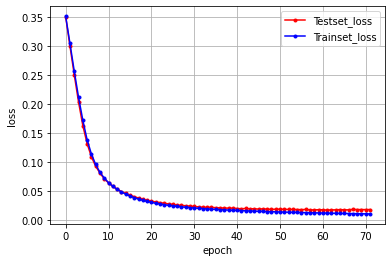

In [ ]:
## 그림을 그려 보자.

# 검증셋과 학습셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
## 테스트도 해보고...

print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

5/5 [==============================] - 0s 3ms/step - loss: 0.0126 - binary_accuracy: 0.9860

 Test Accuracy: 0.9860


 **Accuarcy 기준(threshold=0.5)를 바꾸기 위해서는 아래를 참고하세요.**

https://keras.io/api/metrics/accuracy_metrics/

예를 들어 이렇게...


```
model.compile(optimizer='sgd',loss='mse',
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0.5)])
```
